<a href="https://colab.research.google.com/github/sileeee/Python-DataScience-Study/blob/master/datascience_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 숫자 손글씨 인식하기
### 분석 가이드
**문제를 이해한다.**  이미지의 각 픽셀을 특징 데이터로 취급하여 어떤 숫자인지 인식하는 문제이다.
**EDA 및 Feature Engineering을 실시한다.**  어떤 식으로 이미지의 픽셀을 특징 데이터로 구성하였는지 파악한다.
**가설 검증 계획을 수립한다.**  classfication을 다루는 머신러닝 모델링
**데이터셋을 구성한다.**  상황과 목적에 따라 적절한 train set, (validation set), test set을 구성한다.
**모델링하고 학습한다. ** DecisionTreeClassifier, RandomForestClassifier, …
**모델을 평가하고 검증한다.**
**최종 결론을 도출한다.**  000모델을 통해 000의 정확도로 숫자 손글씨를 OCR할 수 있다.
### 코딩 시나리오
1) 데이터를 불러옵니다.
2)EDA 및 Feature Engineering을 실시합니다.
3)데이터셋을 구성합니다.
4)모델링하고 학습합니다.
5)모델을 평가하고 검증합니다.
6)최종 결론을 도출합니다.



```

**문제 정의**
28x28 픽셀의 손글씨 숫자 이미지를 입력받아 실제로 의미하는 숫자를 인식한다.

**가설 수립**
28x28 픽셀 데이터, 즉 784종의 특징 데이터를 구성한 후 머신러닝을 통해 실제로 어떤 숫자인지 추측할 수 있다.

**목표**
28x28 사이즈의 숫자 손글씨 이미지로 부터 label값을 얻어낸다.

```

### 1. 데이터 불러오기

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('./digit.csv')
df.head()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10","pixel 1,11","pixel 1,12","pixel 1,13","pixel 1,14","pixel 1,15","pixel 1,16","pixel 1,17","pixel 1,18","pixel 1,19","pixel 1,20","pixel 1,21","pixel 1,22","pixel 1,23","pixel 1,24","pixel 1,25","pixel 1,26","pixel 1,27","pixel 1,28","pixel 2,1","pixel 2,2","pixel 2,3","pixel 2,4","pixel 2,5","pixel 2,6","pixel 2,7","pixel 2,8","pixel 2,9","pixel 2,10","pixel 2,11","pixel 2,12",...,"pixel 27,18","pixel 27,19","pixel 27,20","pixel 27,21","pixel 27,22","pixel 27,23","pixel 27,24","pixel 27,25","pixel 27,26","pixel 27,27","pixel 27,28","pixel 28,1","pixel 28,2","pixel 28,3","pixel 28,4","pixel 28,5","pixel 28,6","pixel 28,7","pixel 28,8","pixel 28,9","pixel 28,10","pixel 28,11","pixel 28,12","pixel 28,13","pixel 28,14","pixel 28,15","pixel 28,16","pixel 28,17","pixel 28,18","pixel 28,19","pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


### 2. EDA & Feature Engineering

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [8]:
df.describe()

,"pixel 1,1","pixel 1,2","pixel 1,3","pixel 1,4","pixel 1,5","pixel 1,6","pixel 1,7","pixel 1,8","pixel 1,9","pixel 1,10","pixel 1,11","pixel 1,12","pixel 1,13","pixel 1,14","pixel 1,15","pixel 1,16","pixel 1,17","pixel 1,18","pixel 1,19","pixel 1,20","pixel 1,21","pixel 1,22","pixel 1,23","pixel 1,24","pixel 1,25","pixel 1,26","pixel 1,27","pixel 1,28","pixel 2,1","pixel 2,2","pixel 2,3","pixel 2,4","pixel 2,5","pixel 2,6","pixel 2,7","pixel 2,8","pixel 2,9","pixel 2,10","pixel 2,11","pixel 2,12",...,"pixel 27,18","pixel 27,19","pixel 27,20","pixel 27,21","pixel 27,22","pixel 27,23","pixel 27,24","pixel 27,25","pixel 27,26","pixel 27,27","pixel 27,28","pixel 28,1","pixel 28,2","pixel 28,3","pixel 28,4","pixel 28,5","pixel 28,6","pixel 28,7","pixel 28,8","pixel 28,9","pixel 28,10","pixel 28,11","pixel 28,12","pixel 28,13","pixel 28,14","pixel 28,15","pixel 28,16","pixel 28,17","pixel 28,18","pixel 28,19","pixel 28,20","pixel 28,21","pixel 28,22","pixel 28,23","pixel 28,24","pixel 28,25","pixel 28,26","pixel 28,27","pixel 28,28",label
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000003,0.000061,0.000097,0.000019,0.000080,0.000237,0.000557,...,0.010180,0.005827,0.003466,0.001542,0.000651,0.000391,0.000210,0.000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000020,0.000098,0.000195,0.000523,0.000727,0.000675,0.000954,0.001730,0.002755,0.003411,0.003589,0.002615,0.001661,0.001277,0.001003,0.000480,0.000239,0.000050,0.000025,0.0,0.0,0.0,0.0,0.0,4.453400
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000313,0.006133,0.007949,0.001458,0.007060,0.013180,0.019907,...,0.088095,0.066810,0.049751,0.032694,0.021186,0.017280,0.012549,0.000195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001992,0.009844,0.009959,0.019340,0.025038,0.021392,0.024843,0.036053,0.045608,0.050951,0.051026,0.043498,0.033351,0.031812,0.027722,0.017804,0.013588,0.003535,0.002500,0.0,0.0,0.0,0.0,0.0,2.884451
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

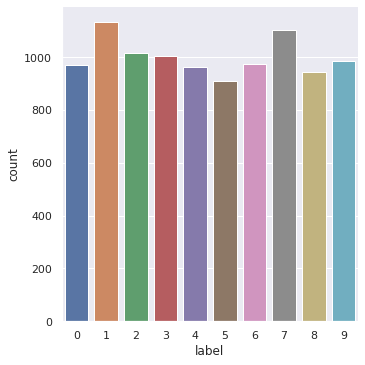

In [9]:
sns.catplot(data=df, x='label', kind='count')

### 이미지 살펴보기

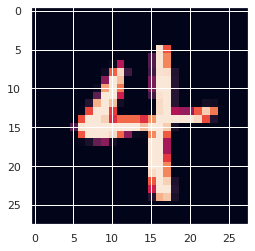

In [10]:
numbers = df.drop(['label'], axis=1)

nth = 0 # 0 ~ 9999까지 바꾸면서 살펴보세요
img = np.reshape(numbers.iloc[nth].values, [28, 28])
plt.imshow(img)
plt.show()

### 3. Dataset 구성하기

In [11]:
train_data = df.drop('label', axis=1)
target_data = df['label']

print(train_data.shape, target_data.shape)

(10000, 784) (10000,)


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 

print(train_data.shape, x_train.shape, x_test.shape)

(10000, 784) (8000, 784) (2000, 784)


### 4. 모델링과 학습

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)

In [14]:
# train 데이터 학습
forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 1.0


### 5. 모델 검증

In [16]:
print('test set accuracy:', forest.score(x_test, y_test)) # 인식정확도 출력

test set accuracy: 0.942


#### 실제 예측 결과물 살펴보기

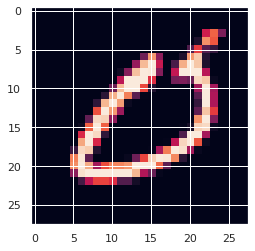

인식된 숫자는 0 입니다.


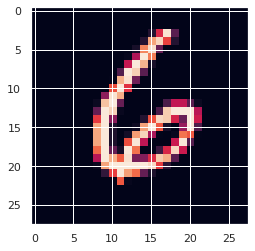

인식된 숫자는 6 입니다.


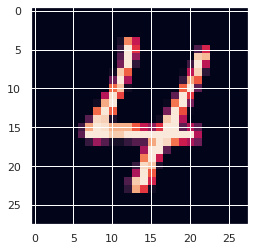

인식된 숫자는 4 입니다.


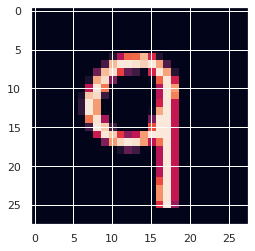

인식된 숫자는 9 입니다.


In [17]:
# random으로 픽하기
import random
for i in range(4):
    n = random.randrange(0, len(x_test))

    img = np.reshape(x_test.iloc[n].values, [28, 28])
    plt.imshow(img)
    plt.show()
    
    result = forest.predict([x_test.iloc[n].values])[0]
    print("인식된 숫자는", result, "입니다.")

### Support Vector Machine(SVR) 사용해보기

In [18]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

print('training set accuracy:', model.score(x_train, y_train))
print('test set accuracy:', model.score(x_test, y_test))

training set accuracy: 0.98625
test set accuracy: 0.959


--------------------------------

# 와인 품질 측정하기
### 분석 가이드
**문제를 이해한다.**  와인의 각종 화학데이터를 기반으로 실제 와인 품질을 추정하는 문제이다.
**EDA 및 Feature Engineering을 실시한다.**  주요 특징과 중요성이 떨어지는 특징을 구분하고 각종 시각화를 진행하여 데이터 구조를 이해한다.
**가설 검증 계획을 수립한다.**  regression을 다루는 머신러닝 모델링
**데이터셋을 구성한다.**  상황과 목적에 따라 적절한 train set, (validation set), test set을 구성한다.
**모델링하고 학습한다. ** DecisionTreeRegressor, RandomForestRegressor, LinearRegression, Ridge, PolynomialFeatures, …
**모델을 평가하고 검증한다.**  더 좋은 평가 방식이 있는지 고민한다.
**최종 결론을 도출한다.**  000모델을 통해 000의 정확도로(혹은 다른 평가지표) 와인의 품질을 추정할 수 있다.

### 코딩 시나리오
1) 데이터를 불러옵니다.
2) EDA 및 Feature Engineering을 실시합니다.
3) 데이터셋을 구성합니다.
4) 모델링하고 학습합니다.
5) 모델을 평가하고 검증합니다.
6) 최종 결론을 도출합니다.

```

**문제 정의**
와인의 화학 측정 데이터로 부터 기존에는 미각, 후각으로 측정하던 와인의 품질을 추정한다.

**가설 수립**
산성도, 알코올 도수 등 정량적으로 측정하는 화학데이터로 특징 데이터를 구성한 후 머신러닝을 통해 미각 측정 없이 와인의 품질을 추정할 수 있다.

**목표**
화학 특징 데이터를 입력받아 0~10 사이의 숫자로 와인 품질을 추정해낸다

```


- 데이터 구성
: 11개 입력 데이터

fixed acidity <br/>
volatile acidity <br/>
citric acid <br/>
residual sugar <br/>
chlorides <br/>
free sulfur dioxide <br/>
total sulfur dioxide <br/>
density <br/>
pH <br/>
sulphates <br/>
alcohol<br/>
출력 데이터 : quality(와인 품질)<br/>

### 1. 데이터 불러오기

In [21]:
import pandas as pd

In [22]:
df = pd.read_csv('./wine.csv')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4.617195
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.782987
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.868157
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.929590
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4.714931


In [23]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.622542
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.858455
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.552934
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,4.982849
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.568807
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.189646
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.456527


### 2. EDA & Feature Engineering

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

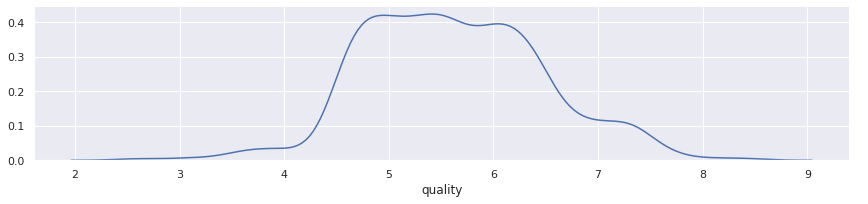

In [25]:
facet = sns.FacetGrid(df, aspect=4)
facet.map(sns.kdeplot, 'quality')
facet.add_legend()

plt.show()

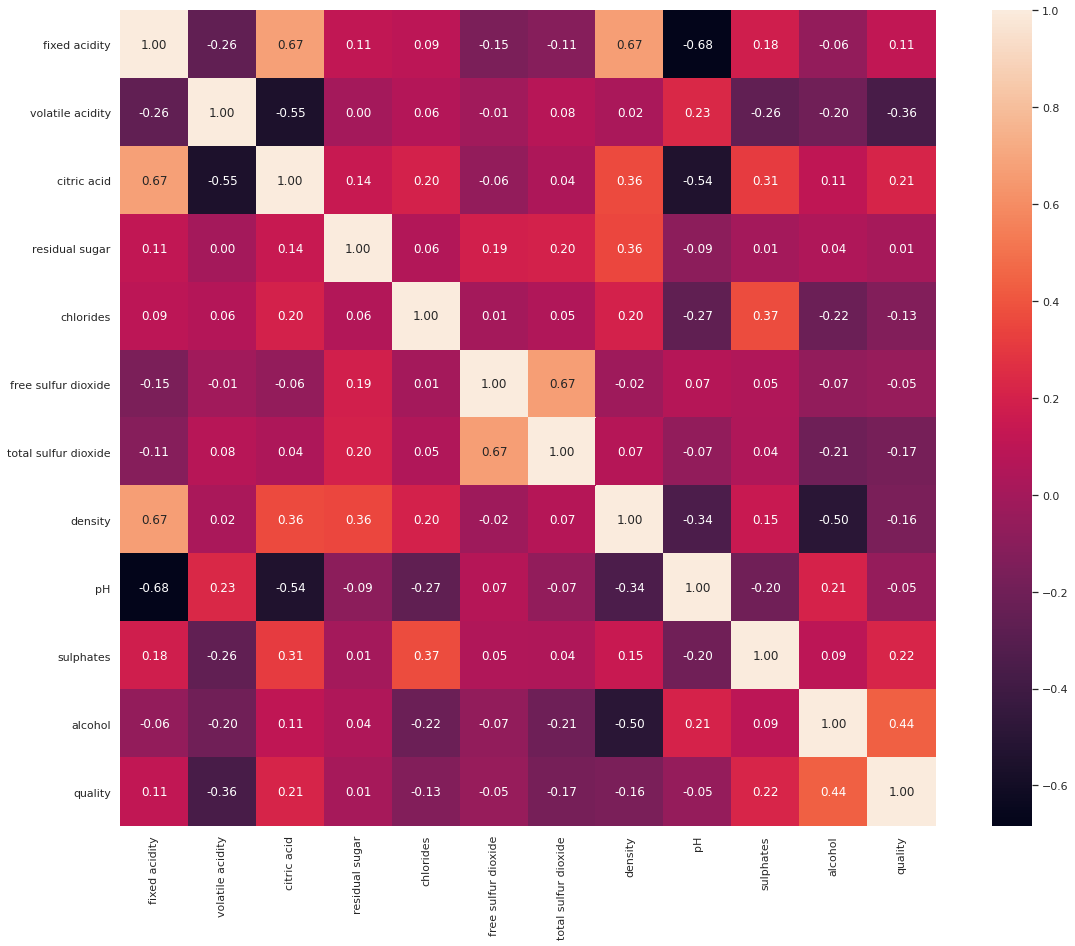

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f', square=True)

plt.show()

### 3. Dataset 구성하기

In [27]:
train_data = df.drop(['quality'], axis=1)
target_data = df['quality']

print(train_data.shape, target_data.shape)

(1599, 11) (1599,)


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size=0.2) 

print(train_data.shape, x_train.shape, x_test.shape)

(1599, 11) (1279, 11) (320, 11)


### 4. 모델링과 학습
#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

In [30]:
# train 데이터 학습
forest.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
print('training set accuracy:', forest.score(x_train, y_train))

training set accuracy: 0.908742867921178


### 5. 모델 검증

In [32]:
y_predict = forest.predict(x_test)
print('test set accuracy:', forest.score(x_test, y_test))

test set accuracy: 0.342053094565556


In [33]:
# 예측값과 실제 답을 비교해보기
comparison = pd.DataFrame(y_test)

comparison['my_predict'] = y_predict
comparison.head()

,quality,my_predict
1226,5.326716,4.931816
1340,5.946322,5.794639
211,5.866661,5.318640
674,5.970076,5.608321
895,5.571095,5.615828


#### 더 좋은 평가지표 고안하기 - 카테고리화

In [34]:
comparison = round(comparison) # 내용물을 모두 반올림하기
comparison.head()

,quality,my_predict
1226,5.0,5.0
1340,6.0,6.0
211,6.0,5.0
674,6.0,6.0
895,6.0,6.0


In [35]:
evaluation = (comparison['quality'] == comparison['my_predict']) # 예측결과와 실제답이 같은지 확인
evaluation.head() # 예측과 실제답이 같을 경우만 True

1226     True
1340     True
211     False
674      True
895      True
dtype: bool

In [36]:
success = (evaluation == True).sum() # 예측 성공건 수 카운팅
failure = (evaluation == False).sum() # 예측 실패건 수 카운팅

print(success / (success + failure)) # 예측 성공률 출력

0.703125


#### 평가 함수 만들기

In [37]:
def my_score(result, answer):
    comparison = pd.DataFrame(answer)

    comparison['my_predict'] = result
    comparison = round(comparison)
    
    evaluation = (comparison['quality'] == comparison['my_predict'])
    success = (evaluation == True).sum()
    failure = (evaluation == False).sum()
    
    return (success / (success + failure))

predict_train = forest.predict(x_train)
predict_test = forest.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test)) # 바로 위에서 구한 예측성공률과 같은 값이 나온다

(category) train set accuracy 0.9218139171227522
(category) test set accuracy 0.703125


#### Support Vector Machine 사용해보기

In [38]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.5355746677091477
(category) test set accuracy 0.55


#### LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

predict_train = lr.predict(x_train)
predict_test = lr.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.584831899921814
(category) test set accuracy 0.615625


#### Polynomial Linear Regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                      LinearRegression()).fit(x_train, y_train)
model.fit(x_train, y_train)

predict_train = model.predict(x_train)
predict_test = model.predict(x_test)
print('(category) train set accuracy', my_score(predict_train, y_train))
print('(category) test set accuracy', my_score(predict_test, y_test))

(category) train set accuracy 0.6137607505863957
(category) test set accuracy 0.6
